# Comtrade dataset EDA

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import comtradeapicall
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from category_encoders import TargetEncoder
import seaborn as sns

In [14]:
df = comtradeapicall.previewFinalData(
    typeCode='C', 
    freqCode='M', 
    clCode='HS', 
    period='202201',
    reporterCode='36',
    cmdCode='91',
    flowCode=None,
    partnerCode=None,
    partner2Code=None,
    customsCode=None,
    motCode=None, 
    maxRecords=500, 
    format_output='JSON',
    aggregateBy=None, 
    breakdownMode='classic', 
    countOnly=None, 
    includeDesc=True
)


In [15]:
print(df.describe())

       refPeriodId  refYear  refMonth  reporterCode  partnerCode  \
count         87.0     87.0      87.0          87.0    87.000000   
mean    20220101.0   2022.0       1.0          36.0   447.183908   
std            0.0      0.0       0.0           0.0   255.446783   
min     20220101.0   2022.0       1.0          36.0     0.000000   
25%     20220101.0   2022.0       1.0          36.0   246.500000   
50%     20220101.0   2022.0       1.0          36.0   458.000000   
75%     20220101.0   2022.0       1.0          36.0   700.500000   
max     20220101.0   2022.0       1.0          36.0   842.000000   

       partner2Code  aggrLevel  motCode  qtyUnitCode   qty  altQtyUnitCode  \
count          87.0       87.0     87.0         87.0  87.0            87.0   
mean            0.0        2.0      0.0         -1.0   0.0            -1.0   
std             0.0        0.0      0.0          0.0   0.0             0.0   
min             0.0        2.0      0.0         -1.0   0.0            -1.0 

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  87 non-null     object 
 1   freqCode                  87 non-null     object 
 2   refPeriodId               87 non-null     int64  
 3   refYear                   87 non-null     int64  
 4   refMonth                  87 non-null     int64  
 5   period                    87 non-null     object 
 6   reporterCode              87 non-null     int64  
 7   reporterISO               87 non-null     object 
 8   reporterDesc              87 non-null     object 
 9   flowCode                  87 non-null     object 
 10  flowDesc                  87 non-null     object 
 11  partnerCode               87 non-null     int64  
 12  partnerISO                87 non-null     object 
 13  partnerDesc               87 non-null     object 
 14  partner2Code

In [17]:
print(df.head(20))

   typeCode freqCode  refPeriodId  refYear  refMonth  period  reporterCode  \
0         C        M     20220101     2022         1  202201            36   
1         C        M     20220101     2022         1  202201            36   
2         C        M     20220101     2022         1  202201            36   
3         C        M     20220101     2022         1  202201            36   
4         C        M     20220101     2022         1  202201            36   
5         C        M     20220101     2022         1  202201            36   
6         C        M     20220101     2022         1  202201            36   
7         C        M     20220101     2022         1  202201            36   
8         C        M     20220101     2022         1  202201            36   
9         C        M     20220101     2022         1  202201            36   
10        C        M     20220101     2022         1  202201            36   
11        C        M     20220101     2022         1  202201    

In [18]:
df.columns.tolist()
for col in df.columns: print(f"Column: {col}")

Column: typeCode
Column: freqCode
Column: refPeriodId
Column: refYear
Column: refMonth
Column: period
Column: reporterCode
Column: reporterISO
Column: reporterDesc
Column: flowCode
Column: flowDesc
Column: partnerCode
Column: partnerISO
Column: partnerDesc
Column: partner2Code
Column: partner2ISO
Column: partner2Desc
Column: classificationCode
Column: classificationSearchCode
Column: isOriginalClassification
Column: cmdCode
Column: cmdDesc
Column: aggrLevel
Column: isLeaf
Column: customsCode
Column: customsDesc
Column: mosCode
Column: motCode
Column: motDesc
Column: qtyUnitCode
Column: qtyUnitAbbr
Column: qty
Column: isQtyEstimated
Column: altQtyUnitCode
Column: altQtyUnitAbbr
Column: altQty
Column: isAltQtyEstimated
Column: netWgt
Column: isNetWgtEstimated
Column: grossWgt
Column: isGrossWgtEstimated
Column: cifvalue
Column: fobvalue
Column: primaryValue
Column: legacyEstimationFlag
Column: isReported
Column: isAggregate


In [19]:
mergedDateDf= df.drop(["refYear", "refMonth"], axis=1)
mergedDateDf['date'] = pd.to_datetime(
    df['refYear'].astype(str) + '-' + df['refMonth'].astype(str) + '-' + '01'
)

print(mergedDateDf['date'])

0    2022-01-01
1    2022-01-01
2    2022-01-01
3    2022-01-01
4    2022-01-01
        ...    
82   2022-01-01
83   2022-01-01
84   2022-01-01
85   2022-01-01
86   2022-01-01
Name: date, Length: 87, dtype: datetime64[ns]


In [20]:
dataset = mergedDateDf[['date', 'partnerDesc', 'reporterCode', 'flowCode', 'primaryValue', 'cmdCode']]
print(dataset.head(20))

         date           partnerDesc  reporterCode flowCode  primaryValue  \
0  2022-01-01                 World            36        M  5.356712e+07   
1  2022-01-01             Australia            36        M  3.663006e+05   
2  2022-01-01               Austria            36        M  6.644963e+05   
3  2022-01-01            Bangladesh            36        M  1.290496e+03   
4  2022-01-01               Belgium            36        M  3.560993e+04   
5  2022-01-01              Bulgaria            36        M  6.203331e+03   
6  2022-01-01                Canada            36        M  4.112082e+03   
7  2022-01-01                 China            36        M  6.990763e+06   
8  2022-01-01               Czechia            36        M  3.484560e+03   
9  2022-01-01               Estonia            36        M  3.392535e+03   
10 2022-01-01                France            36        M  1.193481e+06   
11 2022-01-01               Germany            36        M  5.548190e+05   
12 2022-01-0

In [21]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

partner_col = pd.DataFrame(
    dataset['partnerDesc']
)

one_hot_encoder.fit(partner_col)

partners = one_hot_encoder.transform(partner_col)

partners_df = pd.DataFrame(
    partners,
    columns = one_hot_encoder.get_feature_names_out(['partnerDesc'])
)

print(partners_df.head())

   partnerDesc_Australia  partnerDesc_Austria  partnerDesc_Bangladesh  \
0                    0.0                  0.0                     0.0   
1                    1.0                  0.0                     0.0   
2                    0.0                  1.0                     0.0   
3                    0.0                  0.0                     1.0   
4                    0.0                  0.0                     0.0   

   partnerDesc_Belgium  partnerDesc_Bhutan  partnerDesc_Bulgaria  \
0                  0.0                 0.0                   0.0   
1                  0.0                 0.0                   0.0   
2                  0.0                 0.0                   0.0   
3                  0.0                 0.0                   0.0   
4                  1.0                 0.0                   0.0   

   partnerDesc_Canada  partnerDesc_China  partnerDesc_China, Hong Kong SAR  \
0                 0.0                0.0                               0.0

In [22]:
flowCode = pd.DataFrame(
    dataset['flowCode']
)

one_hot_encoder.fit(flowCode)
flowCode_encoded = one_hot_encoder.transform(flowCode)

flowCode_en_df = pd.DataFrame(
    flowCode_encoded,
    columns=one_hot_encoder.get_feature_names_out(['flowCode'])
)

dataset = dataset.drop(['flowCode'], axis=1)

In [23]:
dataset = pd.concat([dataset, partners_df, flowCode_en_df], axis=1)

dataset = dataset.drop(['partnerDesc'], axis=1)
print(dataset.head(10))

        date  reporterCode  primaryValue cmdCode  partnerDesc_Australia  \
0 2022-01-01            36  5.356712e+07      91                    0.0   
1 2022-01-01            36  3.663006e+05      91                    1.0   
2 2022-01-01            36  6.644963e+05      91                    0.0   
3 2022-01-01            36  1.290496e+03      91                    0.0   
4 2022-01-01            36  3.560993e+04      91                    0.0   
5 2022-01-01            36  6.203331e+03      91                    0.0   
6 2022-01-01            36  4.112082e+03      91                    0.0   
7 2022-01-01            36  6.990763e+06      91                    0.0   
8 2022-01-01            36  3.484560e+03      91                    0.0   
9 2022-01-01            36  3.392535e+03      91                    0.0   

   partnerDesc_Austria  partnerDesc_Bangladesh  partnerDesc_Belgium  \
0                  0.0                     0.0                  0.0   
1                  0.0          

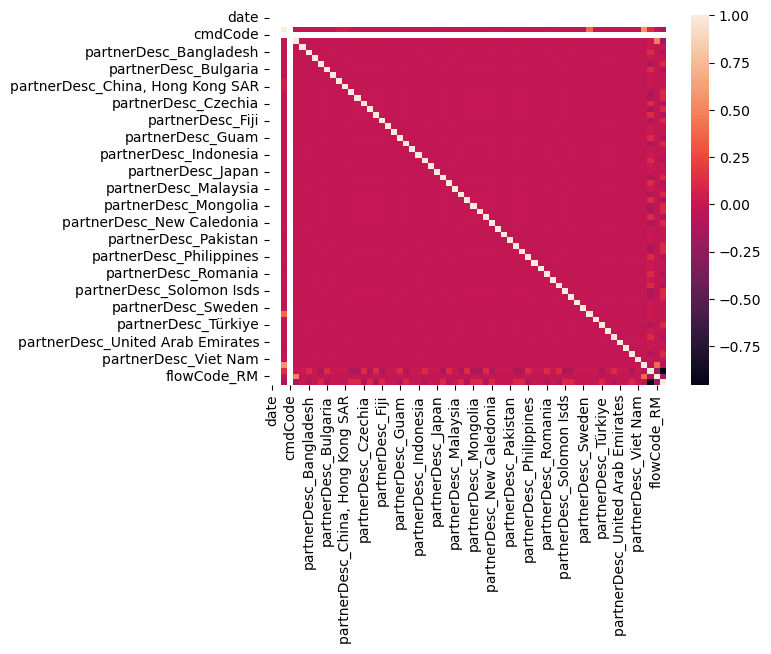